# efood BI Assessment
### March 2021

### Work on BigQuery

Since I didn't have the required permissions to connect with BigQuery's API, I had to download the 'orders_jan2021' table as csv in order to load it in the notebook and work with it.

### 0. Import libraries

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sn
import matplotlib
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

### 1. Load and Explore the dataset

##### a. Data load and manipulation

In [2]:
# Load the data
orders_Jan21 = pd.read_csv("orders_Jan21.csv")

# Check the size of the loaded dataframe
print(orders_Jan21.shape)

# Check for missing values
print(orders_Jan21.isna().sum().sort_values(ascending=False))

# Get the data type info
print(orders_Jan21.info())

# Look at a random sample of 10 rows
orders_Jan21.sample(5)



(400000, 8)
order_id          0
brand             0
submit_dt         0
user_id           0
shop_id           0
city              0
cuisine_parent    0
basket            0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   order_id        400000 non-null  int64  
 1   brand           400000 non-null  object 
 2   submit_dt       400000 non-null  object 
 3   user_id         400000 non-null  int64  
 4   shop_id         400000 non-null  int64  
 5   city            400000 non-null  object 
 6   cuisine_parent  400000 non-null  object 
 7   basket          400000 non-null  float64
dtypes: float64(1), int64(3), object(4)
memory usage: 24.4+ MB
None


,order_id,brand,submit_dt,user_id,shop_id,city,cuisine_parent,basket
290528,2878252643,GR-EFOOD,2021-01-22 14:54:39 UTC,4326300,233256927,Τρίκαλα,Breakfast,6.4
127318,2833793580,GR-EFOOD,2021-01-09 23:33:51 UTC,96721808,188493330,Κιλκίς,Italian,12.7
2580,2808649713,GR-EFOOD,2021-01-02 22:23:44 UTC,88027302,188124678,Γρεβενά,Meat,7.0
195194,2854785860,GR-EFOOD,2021-01-15 21:58:14 UTC,4023804,174353517,Τρίπολη,Creperie,3.0
46354,2869491319,GR-EFOOD,2021-01-19 22:33:40 UTC,187921868,209982003,Λάρισα,Meat,6.2


The submit_dt type is object, so it's better to turn it into a datetime format to be easier on working with that. Then we will parse the date and time from that and make tow new columns that hold the date and time of the order seperately.

In [3]:
orders_Jan21['submit_dt'] = pd.to_datetime(orders_Jan21['submit_dt'], format = '%Y-%m-%d %H:%M:%S %Z')
orders_Jan21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   order_id        400000 non-null  int64              
 1   brand           400000 non-null  object             
 2   submit_dt       400000 non-null  datetime64[ns, UTC]
 3   user_id         400000 non-null  int64              
 4   shop_id         400000 non-null  int64              
 5   city            400000 non-null  object             
 6   cuisine_parent  400000 non-null  object             
 7   basket          400000 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(1), int64(3), object(3)
memory usage: 24.4+ MB


In [4]:
# Split the submit_dt column into date and time, creating two new columns 
orders_Jan21['submit_date'] = orders_Jan21['submit_dt'].dt.date
orders_Jan21['submit_time'] = orders_Jan21['submit_dt'].dt.time
orders_Jan21['day_name'] = orders_Jan21['submit_dt'].dt.day_name()

print(orders_Jan21.info())
orders_Jan21.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   order_id        400000 non-null  int64              
 1   brand           400000 non-null  object             
 2   submit_dt       400000 non-null  datetime64[ns, UTC]
 3   user_id         400000 non-null  int64              
 4   shop_id         400000 non-null  int64              
 5   city            400000 non-null  object             
 6   cuisine_parent  400000 non-null  object             
 7   basket          400000 non-null  float64            
 8   submit_date     400000 non-null  object             
 9   submit_time     400000 non-null  object             
 10  day_name        400000 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(3), object(6)
memory usage: 33.6+ MB
None


,order_id,brand,submit_dt,user_id,shop_id,city,cuisine_parent,basket,submit_date,submit_time,day_name
0,2846837765,GR-EFOOD,2021-01-13 20:37:06+00:00,99103596,206490318,Βόλος,Healthy / Other,9.0,2021-01-13,20:37:06,Wednesday
1,2878146359,GR-EFOOD,2021-01-22 14:28:57+00:00,77179398,206490318,Βόλος,Healthy / Other,7.0,2021-01-22,14:28:57,Friday
2,2904155390,GR-EFOOD,2021-01-29 13:52:24+00:00,7233822,206490318,Βόλος,Healthy / Other,6.3,2021-01-29,13:52:24,Friday
3,2867086278,GR-EFOOD,2021-01-19 12:19:59+00:00,68621466,206490318,Βόλος,Healthy / Other,7.0,2021-01-19,12:19:59,Tuesday
4,2875723043,GR-EFOOD,2021-01-21 20:08:59+00:00,17007258,206490318,Βόλος,Healthy / Other,11.8,2021-01-21,20:08:59,Thursday


*On the next step, we create a new column that holds the part of the day when the order was made.*

In [5]:
orders_Jan21['part_of_day'] = pd.cut(orders_Jan21.submit_dt.dt.hour, 4, labels = ['Night','Morning','Afternoon','Evening'])

orders_Jan21.head(5)

orders_Jan21['part_of_day'].value_counts()
# orders_Jan21[orders_Jan21['part_of_day'].isna()]


Evening      191523
Afternoon    130450
Morning       66801
Night         11226
Name: part_of_day, dtype: int64

##### b. Summary Statistics on the orders data

In [6]:
# Have a look in the basket values
orders_Jan21.basket.describe()

count    400000.000000
mean          8.723202
std           6.535030
min           0.000000
25%           4.480000
50%           6.800000
75%          11.200000
max         151.850000
Name: basket, dtype: float64

From the summary above we can see that half of the orders had 6.8 or less items in their basket

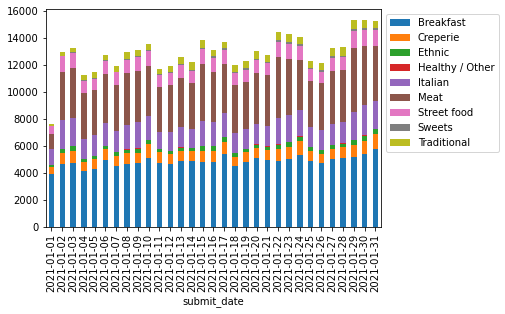

In [7]:
orders_Jan21.groupby(['submit_date', 'cuisine_parent'])['order_id'].count().unstack().plot.bar(stacked=True).legend(bbox_to_anchor=(1.0, 1.0))

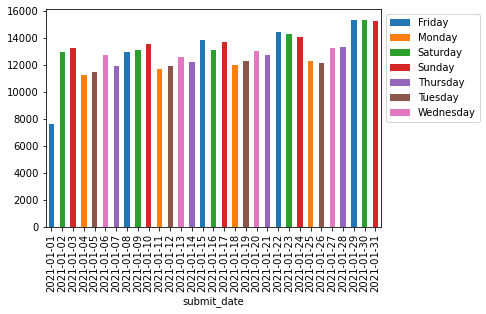

In [8]:
orders_Jan21.groupby(['submit_date', 'day_name'])['order_id'].count().unstack().plot.bar(stacked=True).legend(bbox_to_anchor=(1.0, 1.0))

We can notice an uptrend on total orders made per day in Jan-21, with a high on the 29th.
We can also see higher volumes on Fridays, Saturdays, Sundays

<AxesSubplot:xlabel='cuisine_parent'>

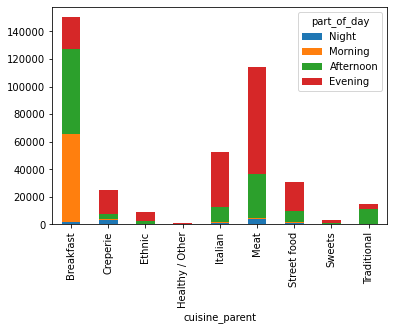

In [9]:
# orders_Jan21.groupby(orders_Jan21.submit_dt.dt.hour).count().part_of_day

orders_Jan21.groupby(['cuisine_parent', 'part_of_day'])['order_id'].count().unstack().plot.bar(stacked=True)

As expected the vast majority of morning orders are for Breakfast, however, less than half of the Breakfast orders are happening in the morning

array([[<AxesSubplot:title={'center':'Night'}>,
        <AxesSubplot:title={'center':'Morning'}>],
       [<AxesSubplot:title={'center':'Afternoon'}>,
        <AxesSubplot:title={'center':'Evening'}>]], dtype=object)

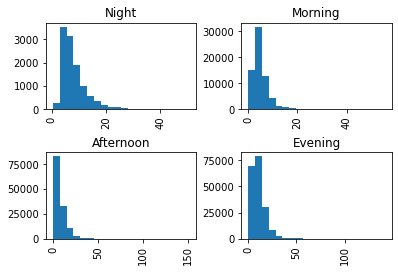

In [10]:
# Value distribution per time of the day
orders_Jan21.hist(column='basket', bins = 20, by = 'part_of_day')

<AxesSubplot:>

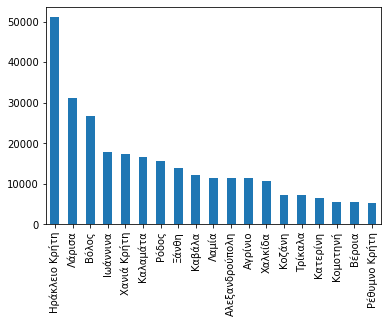

In [11]:
# Get the 20 cities with the most orders
orders_Jan21['city'].value_counts()[1:20].plot.bar(stacked=True)

### 2. Customer view of the data

#### a. Customer aggregations

In [58]:
# Customer level statistics

# Get the next day after the last submitted order in the dataset
snapshot_dt = orders_Jan21['submit_dt'].max() + dt.timedelta(days=1)

# Create a customer level dataset
cust_df1 = orders_Jan21.groupby('user_id').agg(               
                last_order_dt= ('submit_date', 'max'),
                days_since_last= ('submit_dt', lambda d: (snapshot_dt - d.max()).days),
                total_days_ordered= ('submit_date', 'nunique'),
                orders_vol= ('order_id', 'count'),
                total_value= ('basket', np.sum),
                avg_value= ('basket', np.mean),
                cuisines_count= ('cuisine_parent', 'nunique'),
                cuisine_sets = ('cuisine_parent', set),
                cities = ('city', set))
    
cust_df1 = cust_df1.reset_index()
cust_df1.head()

,user_id,last_order_dt,days_since_last,total_days_ordered,orders_vol,total_value,avg_value,cuisines_count,cuisine_sets,cities
0,27462,2021-01-06,26,1,1,10.6,10.60,1,{Traditional},{Χανιά Κρήτη}
1,39238,2021-01-27,5,2,2,35.0,17.50,1,{Italian},{Ρόδος}
2,41354,2021-01-28,4,4,4,29.0,7.25,2,"{Meat, Breakfast}",{Αγρίνιο}
3,44068,2021-01-17,15,1,1,19.5,19.50,1,{Meat},{Κέρκυρα}
4,49220,2021-01-04,28,1,1,5.3,5.30,1,{Creperie},{Άρτα}


In [60]:
# Change the last_order_dt format to date
cust_df1['last_order_dt'] = pd.to_datetime(cust_df1['last_order_dt']).dt.date

# Change the cuisine_sets and cities format to string so we can summarise them
cust_df1['cuisine_sets'] = cust_df1['cuisine_sets'].astype(str)
cust_df1['cities'] = cust_df1['cities'].astype(str)

# Get a view of the 5 most active customers
cust_df1.sort_values(['orders_vol', 'cuisines_count'], ascending = False).head(5)

,user_id,last_order_dt,days_since_last,total_days_ordered,orders_vol,total_value,avg_value,cuisines_count,cuisine_sets,cities,cuisine_set
115910,106414882,2021-01-31,1,21,33,202.3,6.130303,5,"{'Traditional', 'Creperie', 'Meat', 'Breakfast...",{'Λαμία'},"{'Traditional', 'Creperie', 'Meat', 'Breakfast..."
56428,50885108,2021-01-30,2,20,31,164.8,5.316129,2,"{'Meat', 'Breakfast'}",{'Χανιά Κρήτη'},"{'Meat', 'Breakfast'}"
48089,42623692,2021-01-31,1,17,29,278.8,9.613793,5,"{'Ethnic', 'Creperie', 'Meat', 'Breakfast', 'I...",{'Αγρίνιο'},"{'Ethnic', 'Creperie', 'Meat', 'Breakfast', 'I..."
12559,12351828,2021-01-31,1,21,28,147.4,5.264286,7,"{'Street food', 'Sweets', 'Traditional', 'Crep...",{'Πάτρα'},"{'Street food', 'Sweets', 'Traditional', 'Crep..."
98465,88123534,2021-01-30,2,20,28,118.4,4.228571,5,"{'Street food', 'Traditional', 'Creperie', 'Me...",{'Αγρίνιο'},"{'Street food', 'Traditional', 'Creperie', 'Me..."


In [42]:
# Get the 1st most appeared itemsets
cust_df1['cuisine_sets'].value_counts()[0:15].sort_values(ascending=False)

{'Meat'}                            34788
{'Breakfast'}                       30222
{'Italian'}                         15855
{'Meat', 'Breakfast'}               12111
{'Street food'}                      8546
{'Meat', 'Italian'}                  5806
{'Creperie'}                         5800
{'Breakfast', 'Italian'}             4590
{'Meat', 'Breakfast', 'Italian'}     3499
{'Traditional'}                      2643
{'Meat', 'Street food'}              2627
{'Ethnic'}                           2476
{'Street food', 'Breakfast'}         2421
{'Meat', 'Creperie'}                 2222
{'Creperie', 'Breakfast'}            2197
Name: cuisine_sets, dtype: int64

Customers with only Meat orders have contributed the most, with almost 35k customers have use only to order Meat

#### b. Customer orders per cuisine

In [15]:
# Find the cuisine first choice of each customer
cust_csn = orders_Jan21.pivot_table('basket', index = 'user_id', columns = 'cuisine_parent', aggfunc = 'count', fill_value = 0).reset_index()
cust_csn['cuisine_choice'] = cust_csn.loc[:, 'Breakfast':'Traditional'].idxmax(axis=1)
cust_csn.head(10)

cuisine_parent,user_id,Breakfast,Creperie,Ethnic,Healthy / Other,Italian,Meat,Street food,Sweets,Traditional,cuisine_choice
0,27462,0,0,0,0,0,0,0,0,1,Traditional
1,39238,0,0,0,0,2,0,0,0,0,Italian
2,41354,2,0,0,0,0,2,0,0,0,Breakfast
3,44068,0,0,0,0,0,1,0,0,0,Meat
4,49220,0,1,0,0,0,0,0,0,0,Creperie
5,49404,0,1,0,0,0,1,0,0,0,Creperie
6,51842,0,0,0,0,0,1,0,0,0,Meat
7,52532,3,0,0,0,1,4,0,0,0,Meat
8,54740,0,0,0,0,0,1,0,0,0,Meat
9,55062,0,0,0,0,1,1,0,0,0,Italian


<AxesSubplot:>

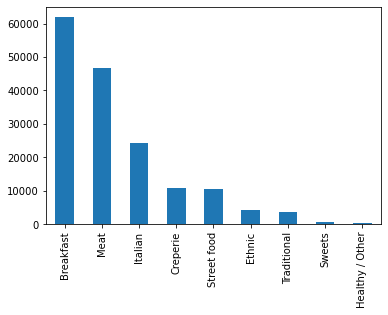

In [16]:
cust_csn['cuisine_choice'].value_counts().plot.bar()

On the chart above we can see that most of the customers' order coffee (Breakfast) more often than other cuisines, however we can't have a clear view since some customers have made the same amount of orders in more than one cuisine

#### c. Join the customer datasets in order to have a final one to work for the customer segmentation

In [17]:
cust_df2 = cust_df1.merge(cust_csn, on = 'user_id', how = 'left')
# cust_df2.to_csv('cust_Jan21.csv')

*Investigate corellations*

<AxesSubplot:xlabel='Breakfast', ylabel='Meat'>

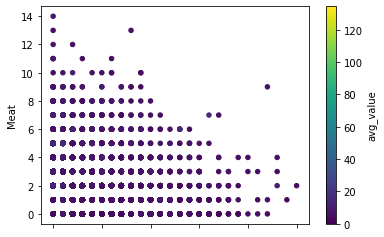

In [18]:
cust_df2.plot.scatter(x='Breakfast', y='Meat', c='avg_value', colormap='viridis')

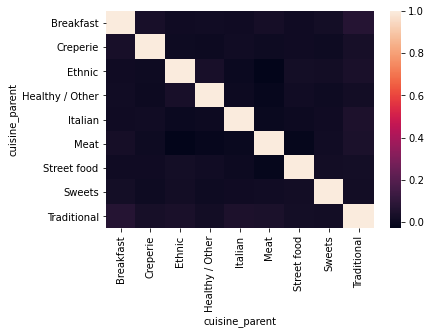

In [19]:
# Check if there is any correlation in customer's cousine choices
corr_mx = cust_csn.loc[:, 'Breakfast':'Traditional'].corr()
sn.heatmap(corr_mx)
plt.show()

# pd.plotting.scatter_matrix(cust_csn.loc[:, 'Breakfast':'Ethnic'], alpha=0.2)

We can't notice any high corellation of the different cuisine choices; ie we don't know if a customer that orders Italian it's very likely to order from a Creperie

### 3. Customer Segmentation

*Now that we have the final customer data available we can start doing the segmentations*

#### a. Check the distribution of the orders made by customer, total basket value and average basket value*

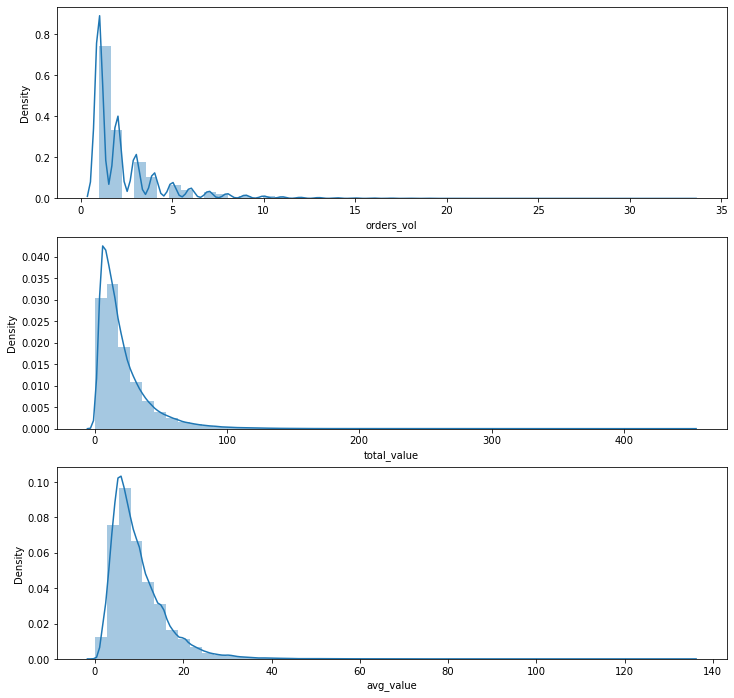

In [20]:
# Plot totals distributions
plt.figure(figsize=(12,12))
# Plot distribution of orders volume
plt.subplot(3, 1, 1); sn.distplot(cust_df2['orders_vol'])
# Plot distribution of basket totals
plt.subplot(3, 1, 2); sn.distplot(cust_df2['total_value'])
# Plot distribution of basket average
plt.subplot(3, 1, 3); sn.distplot(cust_df2['avg_value'])
# Show the plot
plt.show()

In [21]:
(cust_df2['orders_vol'].value_counts()/cust_df2['user_id'].count()).head(10)

1     0.474778
2     0.214318
3     0.114824
4     0.066951
5     0.041828
6     0.026946
7     0.018686
8     0.012322
9     0.008524
10    0.006106
Name: orders_vol, dtype: float64

47% of the customers in Jan-21 have made 0nly 1 order, 33% 2-3, and only 20% have made 4 or more

In [61]:
# Get basic summary statistics from the data
pd.DataFrame(cust_df2.loc[:, 'days_since_last':'avg_value'].describe().round(2))

,days_since_last,total_days_ordered,orders_vol,total_value,avg_value
count,162954.00,162954.00,162954.00,162954.00,162954.00
mean,11.58,2.35,2.45,21.41,9.75
std,8.83,2.06,2.31,20.12,6.35
min,1.00,1.00,1.00,0.00,0.00
25%,4.00,1.00,1.00,8.40,5.50
50%,9.00,2.00,2.00,15.20,8.10
75%,18.00,3.00,3.00,27.40,12.30
max,31.00,22.00,33.00,449.05,134.50


*In the next step, we group customers by ordering frequency and basket value (assuming that more items give higher value). Because the distributions are not normal but right skewed, I found it better to use the quartil values as appear in the statistical summary above*

In [23]:
# Define orders frequency segments
def freq_seg(df):
    if df['orders_vol'] == 1: x = 1
    elif df['orders_vol'] <= 2: x = 2
    elif df['orders_vol'] <= 3: x = 3
    else: x = 4
    return x
    
# Define basket totals segments
def val_seg(df):
    if df['total_value'] <= 8.4: x = 1
    elif df['total_value'] <= 15.2: x = 2
    elif df['total_value'] <= 27.4: x = 3
    else: x =  4
    return x

# Create two new columns to hold the customer groups
cust_df2['frequency'] = cust_df2.apply(freq_seg, axis = 1)
cust_df2['value'] = cust_df2.apply(val_seg, axis = 1)

In [24]:
# Check if the groups are well distributed
print(cust_df2['frequency'].value_counts())
print(cust_df2['value'].value_counts())

1    77367
2    34924
4    31952
3    18711
Name: frequency, dtype: int64
1    41220
3    40683
4    40643
2    40408
Name: value, dtype: int64


We got a pretty good distribution of the customers into the 4 segments per variable

In [25]:
# Add the segments to get a score per customer
cust_df2['score'] = cust_df2[['frequency', 'value']].sum(axis=1)
cust_df2['score'].value_counts()

2    36621
3    28823
4    24952
8    23957
5    18949
6    15671
7    13981
Name: score, dtype: int64

In [26]:
# Define customer value per segment
def fv_level(df):
    if df['score'] >= 8: 
        level = 'Loyal'
    elif (df['score'] >= 5 and df['score'] < 8):
        level =  'Potential'
    elif (df['score'] >= 3 and df['score'] < 5):
        level = 'Promising'
    else:
        level = 'Not Active'
    return level
           
cust_df2['level'] = cust_df2.apply(fv_level, axis = 1)
cust_df2['level'].value_counts()

Promising     53775
Potential     48601
Not Active    36621
Loyal         23957
Name: level, dtype: int64

In [27]:
cust_df2[cust_df2['level'] == 'Loyal']

,user_id,last_order_dt,days_since_last,total_days_ordered,orders_vol,total_value,avg_value,cuisines_count,cuisine_sets,cities,...,Italian,Meat,Street food,Sweets,Traditional,cuisine_choice,frequency,value,score,level
2,41354,2021-01-28,4,4,4,29.00,7.250000,2,"{'Meat', 'Breakfast'}",{'Αγρίνιο'},...,0,2,0,0,0,Breakfast,4,4,8,Loyal
7,52532,2021-01-22,10,8,8,74.10,9.262500,3,"{'Meat', 'Breakfast', 'Italian'}",{'Ηράκλειο Κρήτη'},...,1,4,0,0,0,Meat,4,4,8,Loyal
38,135792,2021-01-21,11,4,4,48.30,12.075000,2,"{'Meat', 'Creperie'}",{'Λαμία'},...,0,1,0,0,0,Creperie,4,4,8,Loyal
40,139150,2021-01-31,1,4,4,31.80,7.950000,1,{'Meat'},{'Σπάρτη'},...,0,4,0,0,0,Meat,4,4,8,Loyal
46,153962,2021-01-30,2,7,7,47.10,6.728571,3,"{'Meat', 'Breakfast', 'Italian'}",{'Λαμία'},...,1,2,0,0,0,Breakfast,4,4,8,Loyal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161926,197158990,2021-01-28,4,3,5,43.20,8.640000,2,"{'Meat', 'Traditional'}",{'Ιωάννινα'},...,0,3,0,0,2,Meat,4,4,8,Loyal
161998,197234522,2021-01-28,4,3,4,31.50,7.875000,2,"{'Breakfast', 'Italian'}",{'Κοζάνη'},...,1,0,0,0,0,Breakfast,4,4,8,Loyal
162220,197451504,2021-01-28,4,3,7,64.60,9.228571,5,"{'Ethnic', 'Traditional', 'Creperie', 'Meat', ...",{'Ιωάννινα'},...,0,1,0,0,1,Breakfast,4,4,8,Loyal
162265,197492030,2021-01-30,2,3,4,50.20,12.550000,4,"{'Meat', 'Creperie', 'Breakfast', 'Italian'}",{'Λαμία'},...,1,1,0,0,0,Breakfast,4,4,8,Loyal


*We can see that most of the customers had lest than 

In [33]:
# View of the 4 customer levels
cust_df2.level.value_counts()

Promising     53775
Potential     48601
Not Active    36621
Loyal         23957
Name: level, dtype: int64

### 4. Next Steps

#### Export the data for the report

In [62]:
cust_df2.to_csv('cust_final.csv')

Work with data is now done. We will forward with the presentation and the final suggestion using Power BI.